# Heart Disease Prediction Data analysis

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("CVD_cleaned.csv")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
# I will keep all the Binary datas which says yes and no


# Data cleanining

In [6]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [7]:
df.shape

(308854, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [9]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [10]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [11]:
df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0


# Yes/No are replaced by Binary digits

In [12]:
df["Smoking_History"] = df["Smoking_History"].replace({'No': 0, 'Yes': 1})
df["Smoking_History"]
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [13]:
binary = ["Exercise", "Heart_Disease", "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", "Arthritis"]

df[binary] = df[binary].replace({'No': 0, 'Yes': 1})

df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


In [14]:
# Now handle General health

In [15]:
df["General_Health"].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [16]:
df1 = df.copy()
df1.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


In [17]:
df1["General_Health"].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [18]:
# input["Is delivering now"] = df["Is delivering now"].replace({'No': 0, 'Yes': 1})
df1["General_Health"] = df1["General_Health"].replace({'Poor':1,'Fair':2,'Good':3,'Very Good':4,'Excellent':5})
df1["General_Health"]

0         1
1         4
2         4
3         1
4         3
         ..
308849    4
308850    2
308851    4
308852    4
308853    5
Name: General_Health, Length: 308854, dtype: int64

In [19]:
df2 = df1.copy()
df2.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,Within the past year,0,1,0,0,0,1,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


In [20]:
# Now handle sex
df["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
df2["Sex"] = df2["Sex"].replace({'Male':1,'Female':2})
df2["Sex"]

0         2
1         2
2         2
3         1
4         1
         ..
308849    1
308850    1
308851    2
308852    1
308853    2
Name: Sex, Length: 308854, dtype: int64

In [22]:
df3 = df2.copy()
df3.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Within the past 2 years,0,0,0,0,0,0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,Within the past year,0,1,0,0,0,1,0,2,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


In [23]:
#Alcohol_Consumption
df["Alcohol_Consumption"].unique()

array([ 0.,  4.,  3.,  8., 30.,  2., 12.,  1.,  5., 10., 20., 17., 16.,
        6., 25., 28., 15.,  7.,  9., 24., 11., 29., 27., 14., 21., 23.,
       18., 26., 22., 13., 19.])

In [24]:
df["Checkup"].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [25]:
# Handle chekcup
df["Checkup"].dtype

dtype('O')

In [26]:
# checkup_mapping = {
#     'Never':0,
#     '5 or more years ago':1,
#     'Within the past 5 years':2,
#     'Within the past 2 years':3,
#     'Within the past year':4

# }

df3['Checkup'] = df3['Checkup'].replace({'Never':0,'5 or more years ago':1,'Within the past 5 years':2,'Within the past 2 years':3,'Within the past year':4})
df3.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1,0,2,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


In [27]:
df4 = df3.copy()
df4.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1,0,2,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


In [28]:

df4.Diabetes.unique()

array([0, 1, 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [29]:
# df2["Sex"] = df2["Sex"].replace({'Male':1,'Female':2})
# df2["Sex"]

df4["Diabetes"] = df4["Diabetes"].replace({'No, pre-diabetes or borderline diabetes':0.5,'Yes, but female told only during pregnancy':1.5 })
df4["Diabetes"]

0         0.0
1         1.0
2         1.0
3         1.0
4         0.0
         ... 
308849    0.0
308850    1.0
308851    1.5
308852    0.0
308853    0.0
Name: Diabetes, Length: 308854, dtype: float64

In [30]:
df5 = df4.copy()

In [31]:
df.Exercise.unique()

array([0, 1], dtype=int64)

In [32]:
df5.Depression.unique()

array([0, 1], dtype=int64)

In [33]:
df5.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1.0,0,2,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,1.0,0,2,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,4,1,1,0,0,0,1.0,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,4,0,0,0,0,0,0.0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


# Exploratory Data Analysis

In [34]:
# Checking general health rating of heart disease patients
# Use df becase df5 has numerical values

Checking general health rating of heart disease patients

In [35]:
# UNivariant analysis
# Distribution of all the variables to see their distribution and to identify potential outliers

Text(0.5, 1.0, 'Distrubution of height(cm)')

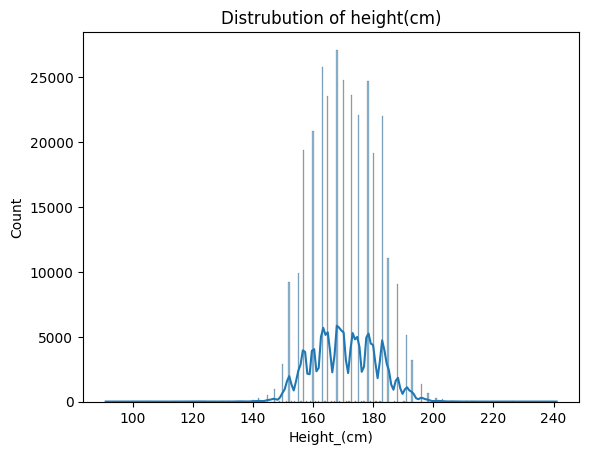

In [36]:
sns.histplot(data=df, x='Height_(cm)', kde=True)
plt.title("Distrubution of height(cm)")

Text(0.5, 1.0, 'Distrubution of Weight_(kg)')

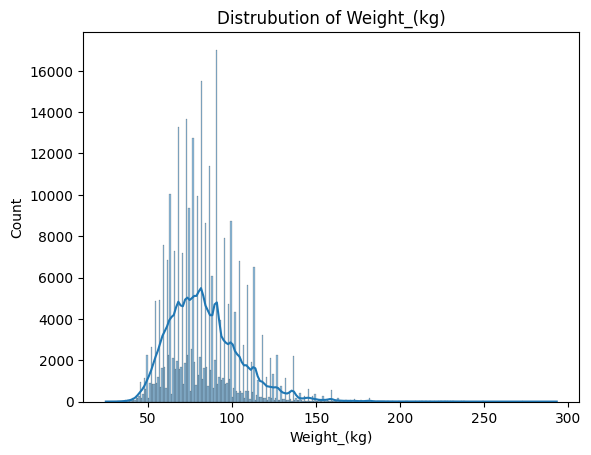

In [37]:
sns.histplot(data=df, x='Weight_(kg)', kde=True)
plt.title("Distrubution of Weight_(kg)")

Text(0.5, 1.0, 'Distrubution of BMI')

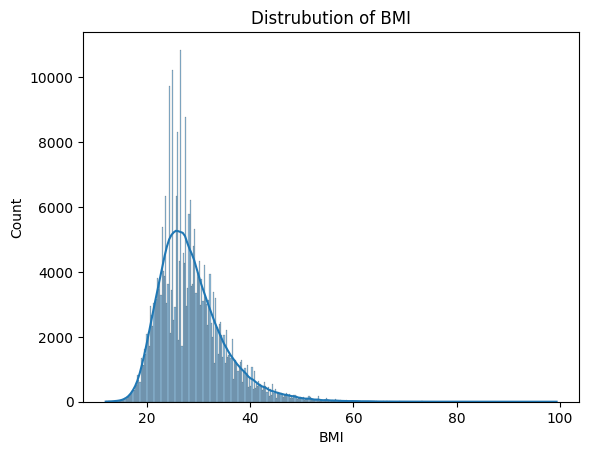

In [38]:
sns.histplot(data=df, x='BMI', kde=True)
plt.title("Distrubution of BMI")

Text(0.5, 1.0, 'Distrubution of Alcohol_Consumption')

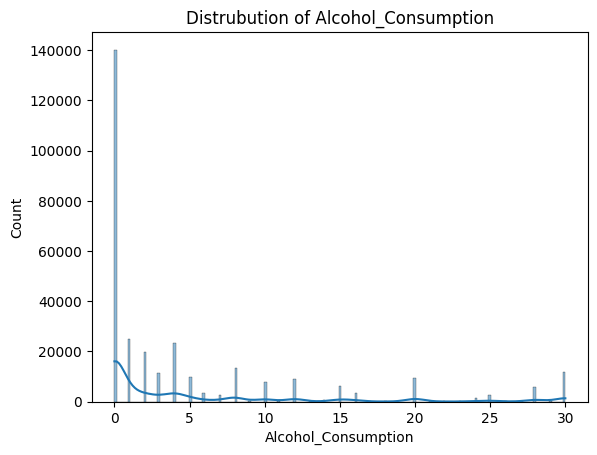

In [40]:
sns.histplot(data=df, x='Alcohol_Consumption', kde=True)
plt.title("Distrubution of Alcohol_Consumption")

Text(0.5, 1.0, 'Distrubution of Fruit_Consumption')

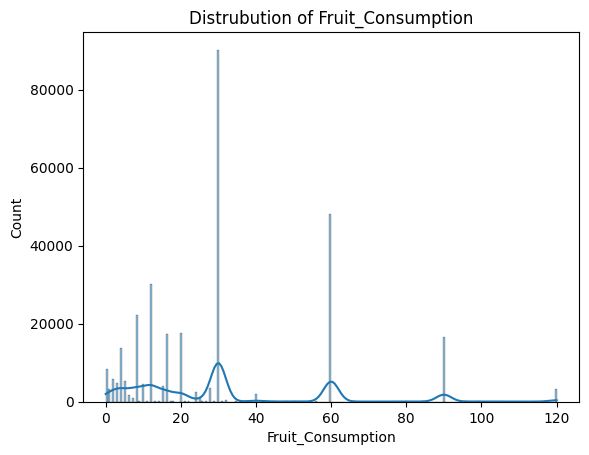

In [41]:
sns.histplot(data=df, x='Fruit_Consumption', kde=True)
plt.title("Distrubution of Fruit_Consumption")

Text(0.5, 1.0, 'Distrubution of Green_Vegetables_Consumption')

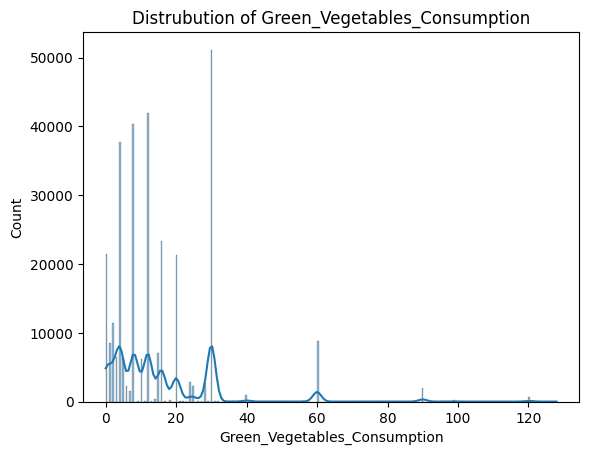

In [42]:
sns.histplot(data=df, x='Green_Vegetables_Consumption', kde=True)
plt.title("Distrubution of Green_Vegetables_Consumption")

Text(0.5, 1.0, 'Distrubution of FriedPotato_Consumption')

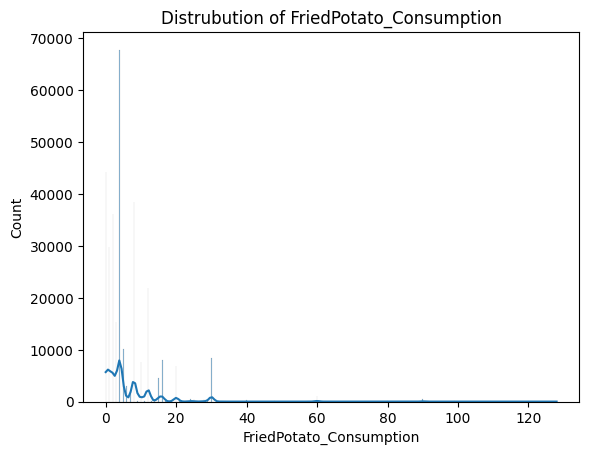

In [44]:
sns.histplot(data=df, x='FriedPotato_Consumption', kde=True)
plt.title("Distrubution of FriedPotato_Consumption")

In [45]:
df.head(1)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0


Checking the distribution of categorical features

Text(0.5, 1.0, "Count of 'General_Health")

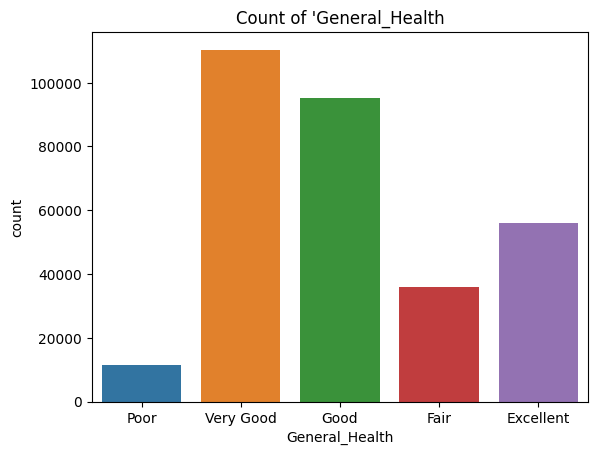

In [46]:
sns.countplot(data=df, x='General_Health')
plt.title("Count of 'General_Health")

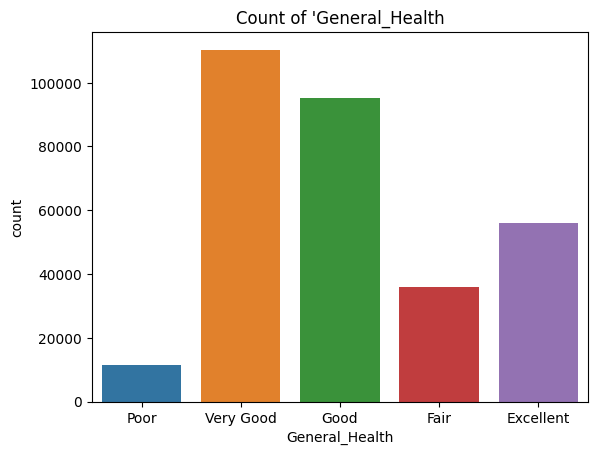

In [47]:
sns.countplot(data=df, x='General_Health')
plt.title("Count of 'General_Health")
plt.show()

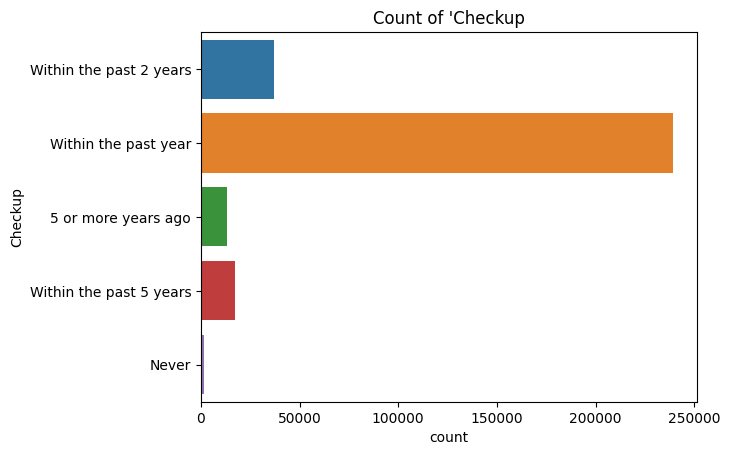

In [48]:
sns.countplot(data=df, y='Checkup')
plt.title("Count of 'Checkup")
plt.show()

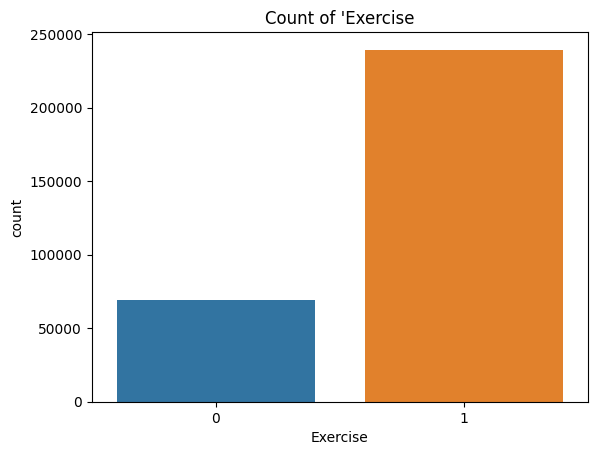

In [49]:
sns.countplot(data=df, x='Exercise')
plt.title("Count of 'Exercise")
plt.show()

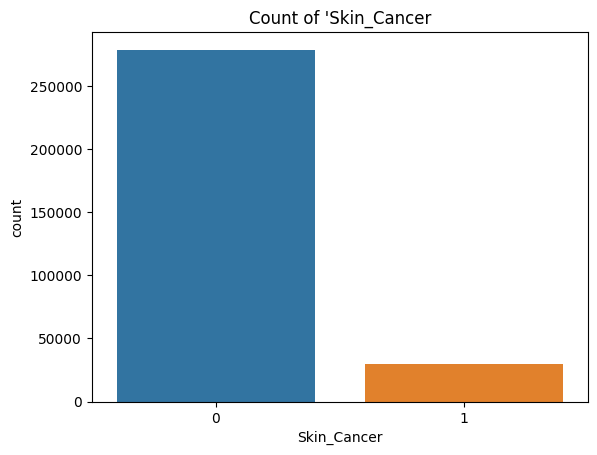

In [50]:
sns.countplot(data=df, x='Skin_Cancer')
plt.title("Count of 'Skin_Cancer")
plt.show()

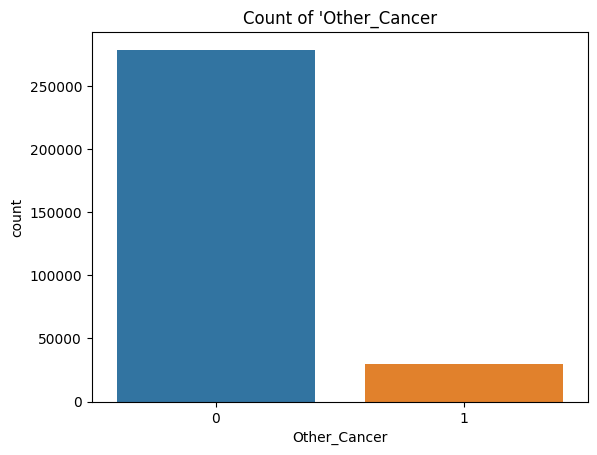

In [51]:
sns.countplot(data=df, x='Other_Cancer')
plt.title("Count of 'Other_Cancer")
plt.show()

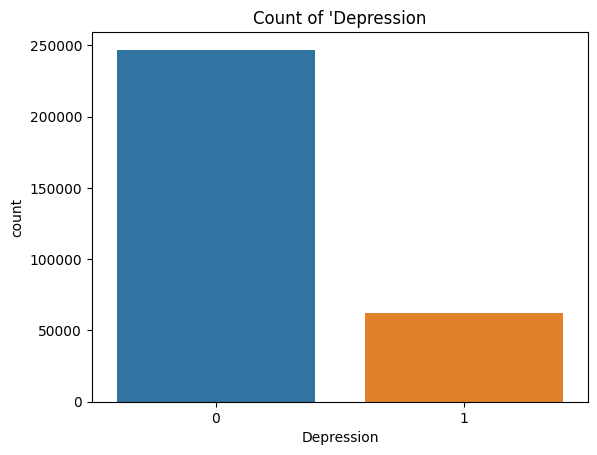

In [52]:
sns.countplot(data=df, x='Depression')
plt.title("Count of 'Depression")
plt.show()

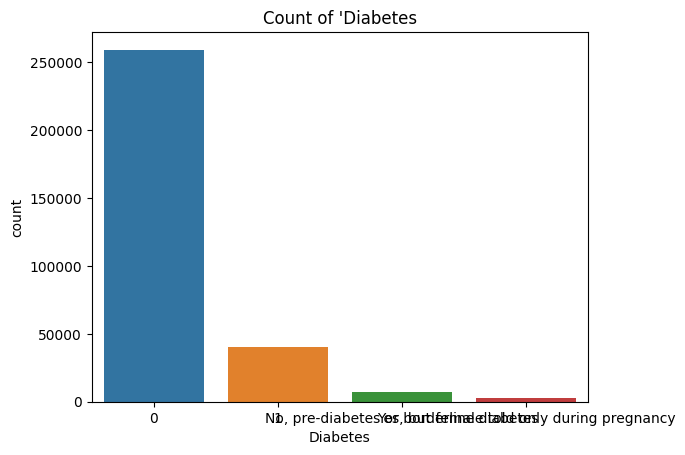

In [53]:
sns.countplot(data=df, x='Diabetes')
plt.title("Count of 'Diabetes")
plt.show()

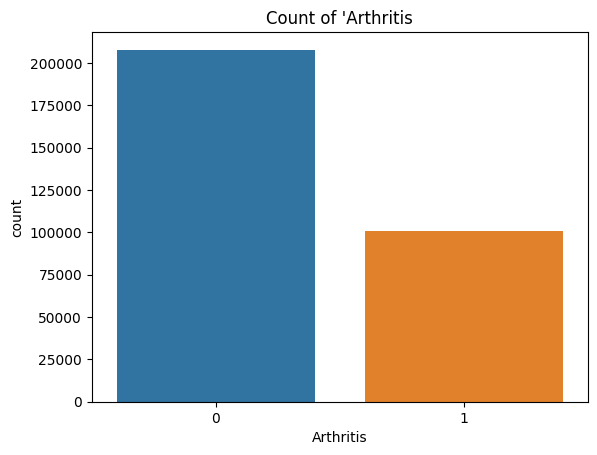

In [54]:
sns.countplot(data=df, x='Arthritis')
plt.title("Count of 'Arthritis")
plt.show()

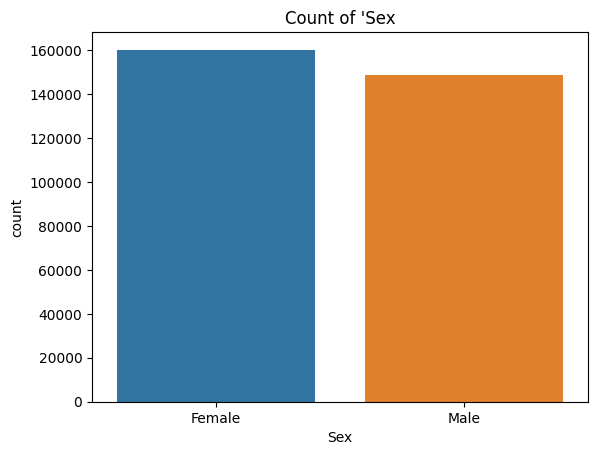

In [55]:
sns.countplot(data=df, x='Sex')
plt.title("Count of 'Sex")
plt.show()

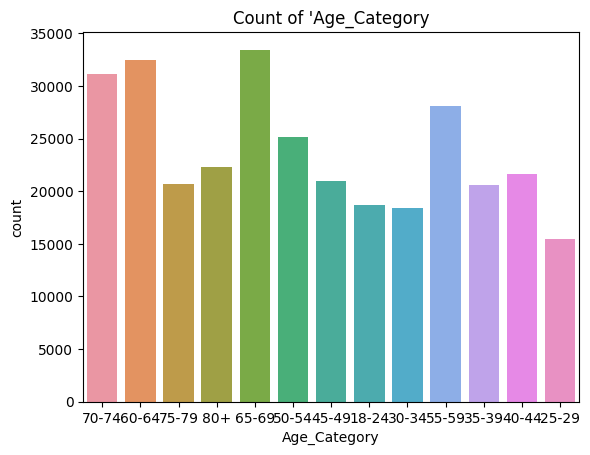

In [56]:
sns.countplot(data=df, x='Age_Category')
plt.title("Count of 'Age_Category")
plt.show()


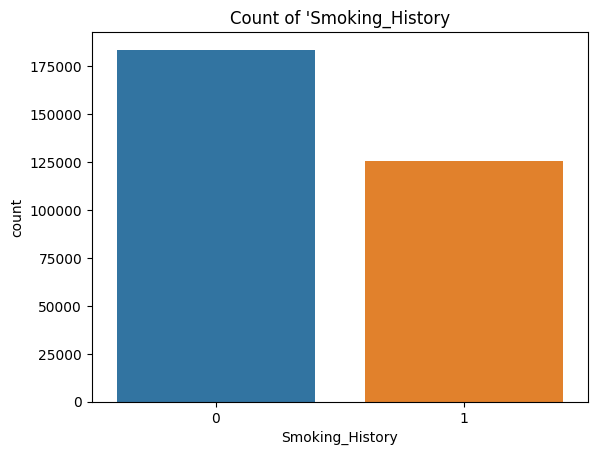

In [57]:
sns.countplot(data=df, x='Smoking_History')
plt.title("Count of 'Smoking_History")
plt.show()


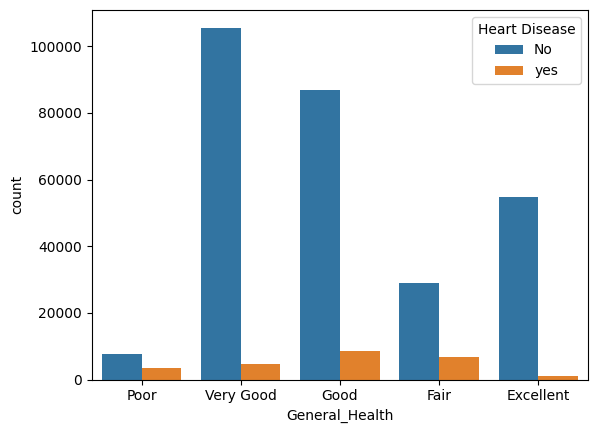

In [58]:
x = sns.countplot(data=df, x="General_Health", hue="Heart_Disease")
plt.legend(title = "Heart Disease", labels=["No","yes"])

Analysing relationship between disease condition and some important variables

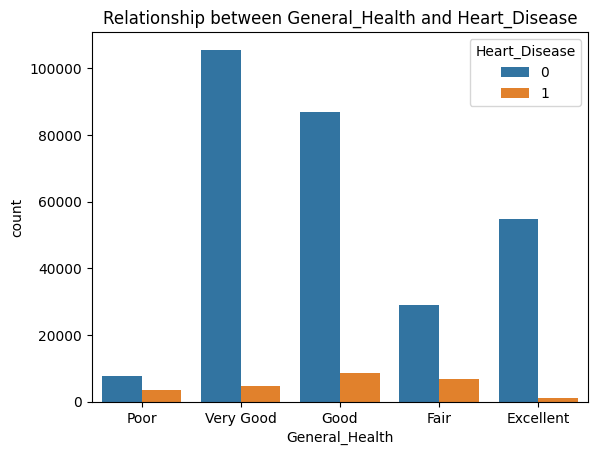

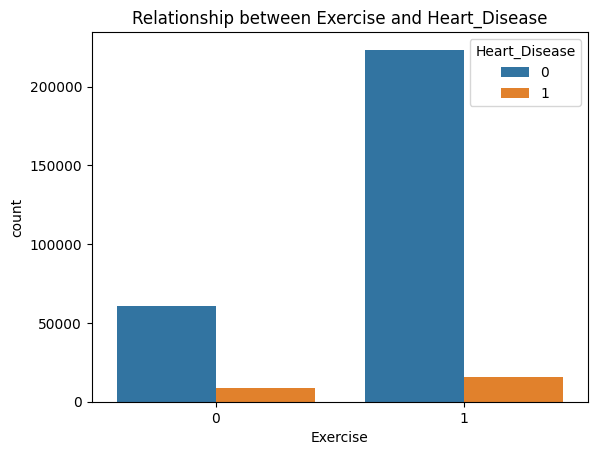

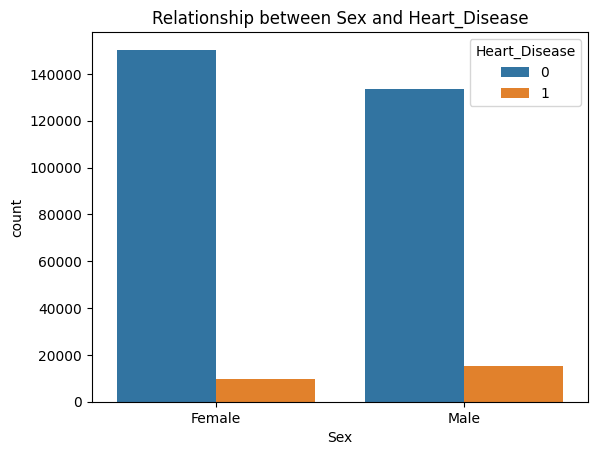

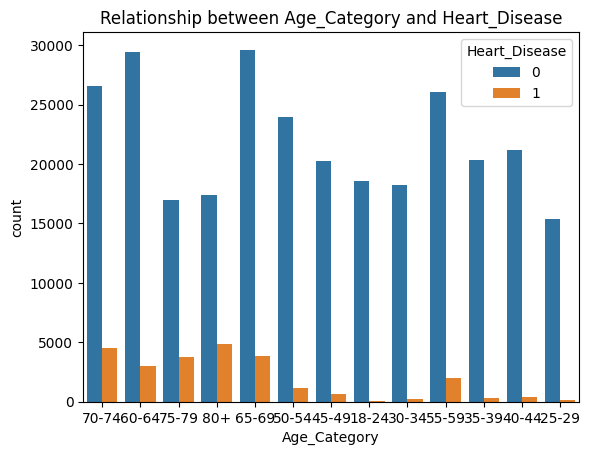

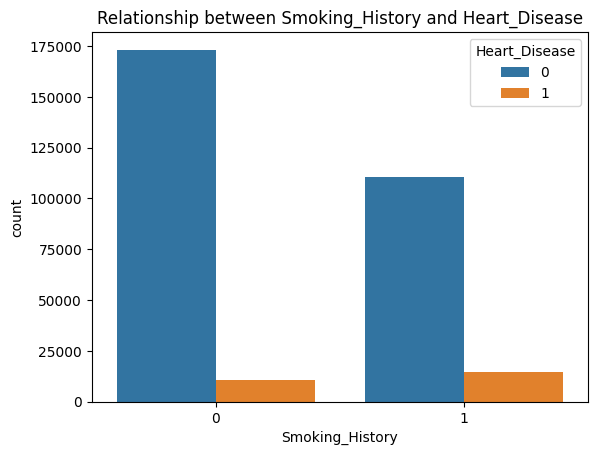

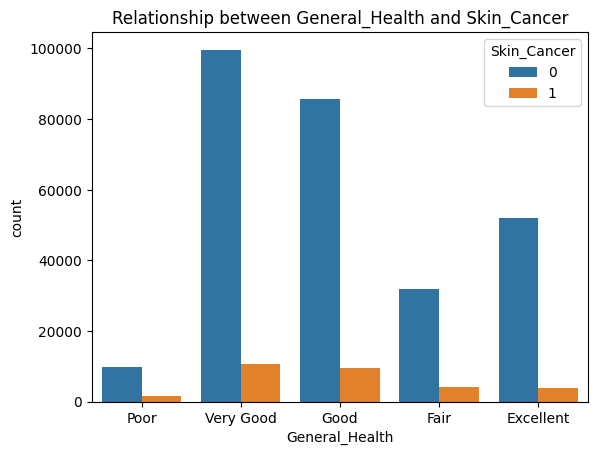

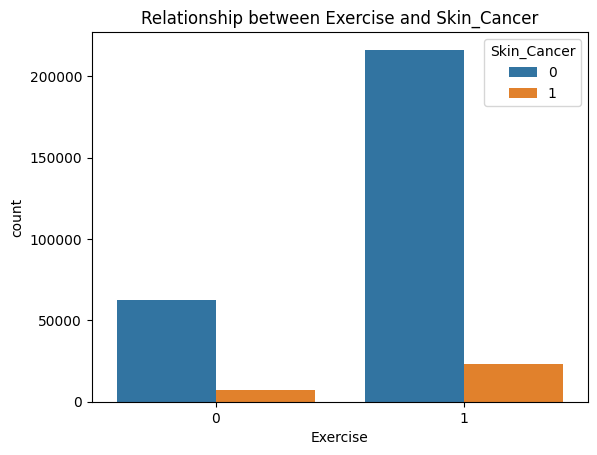

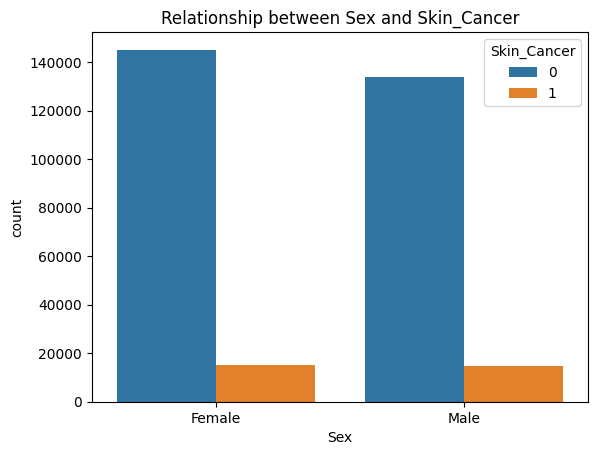

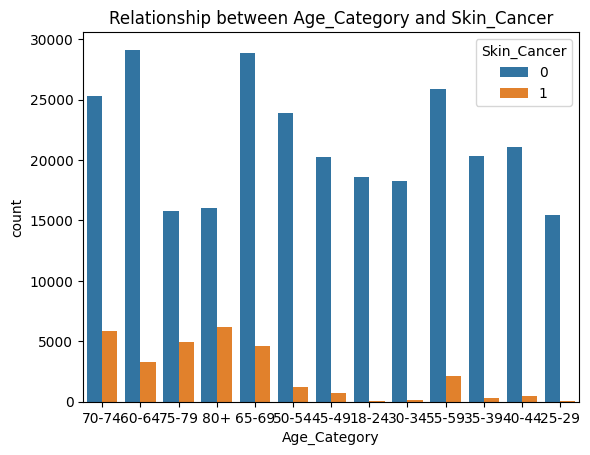

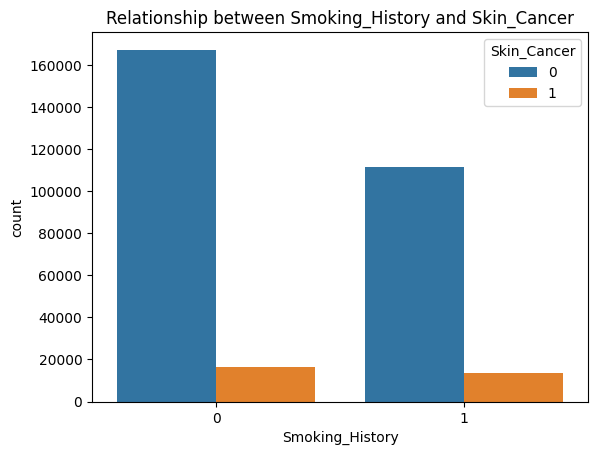

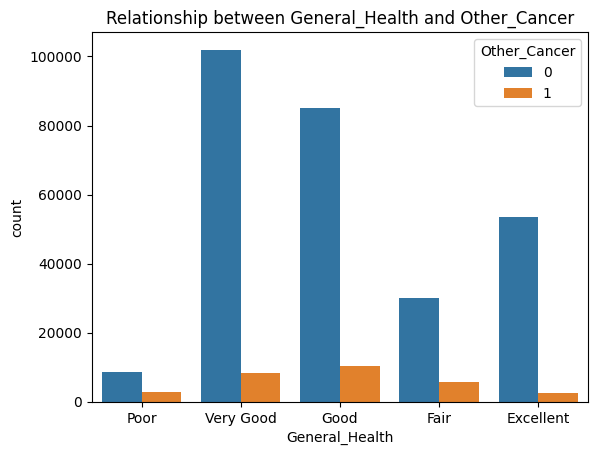

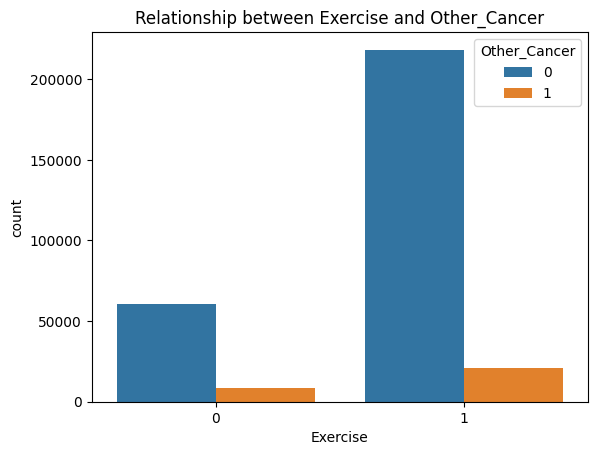

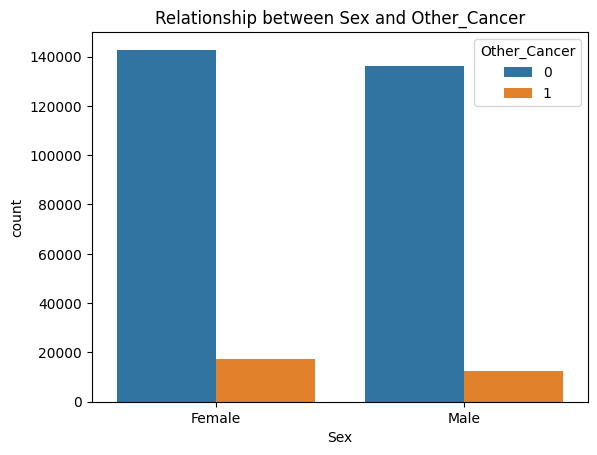

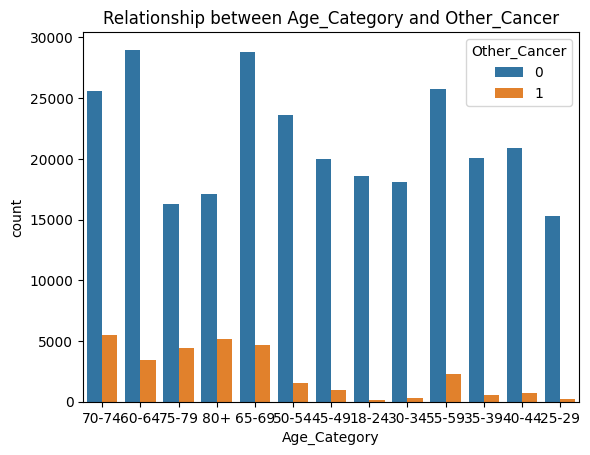

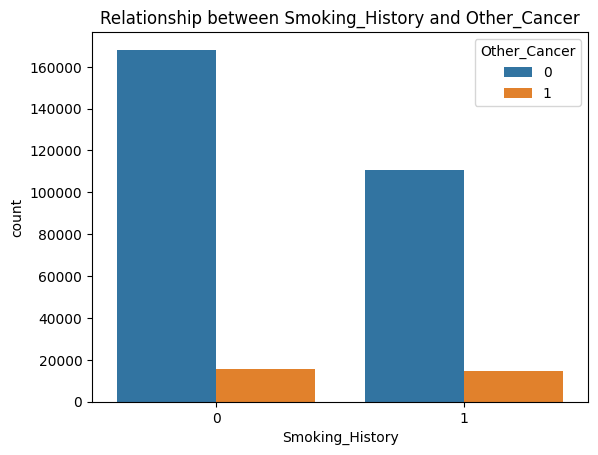

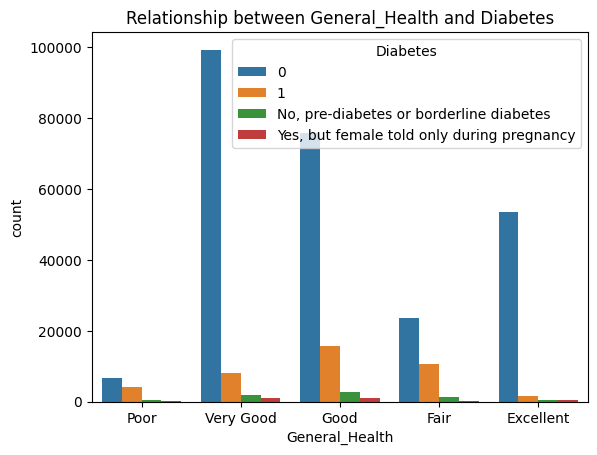

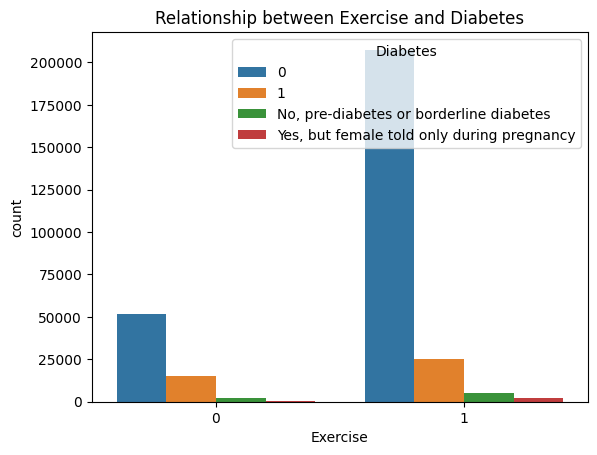

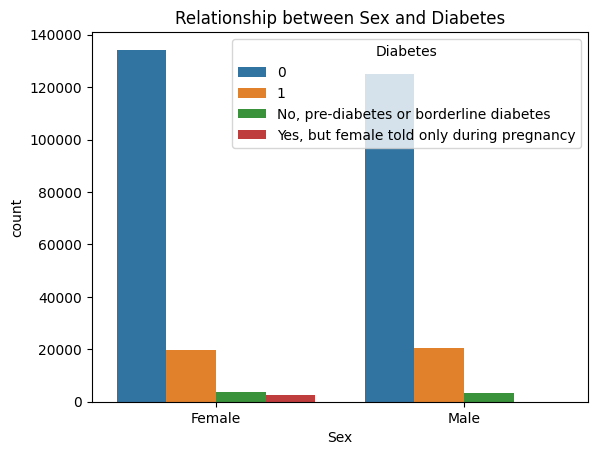

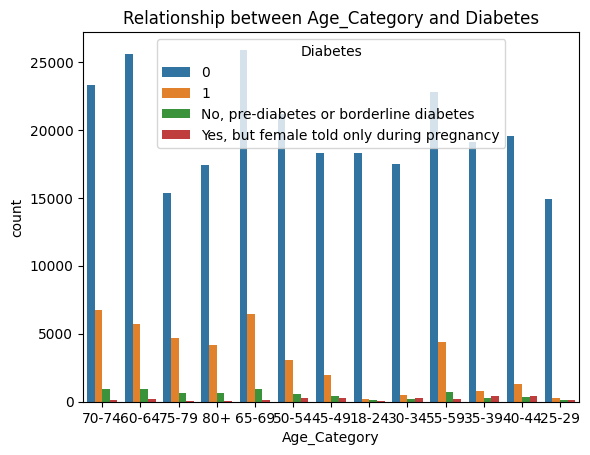

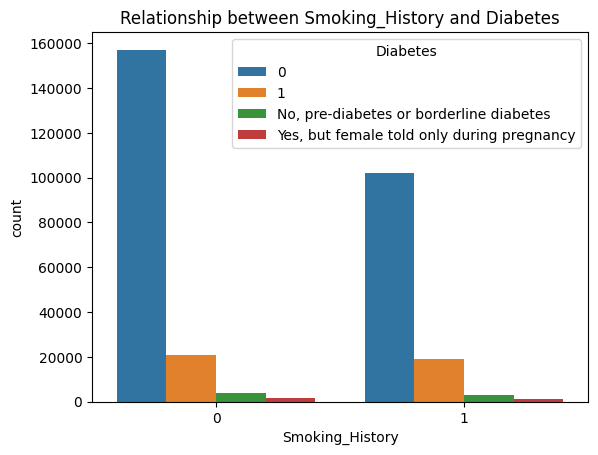

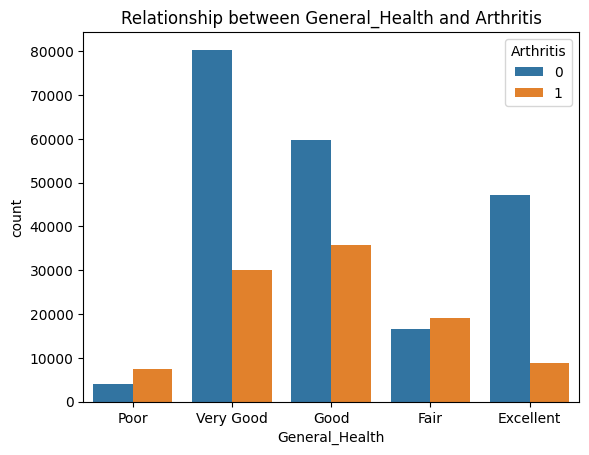

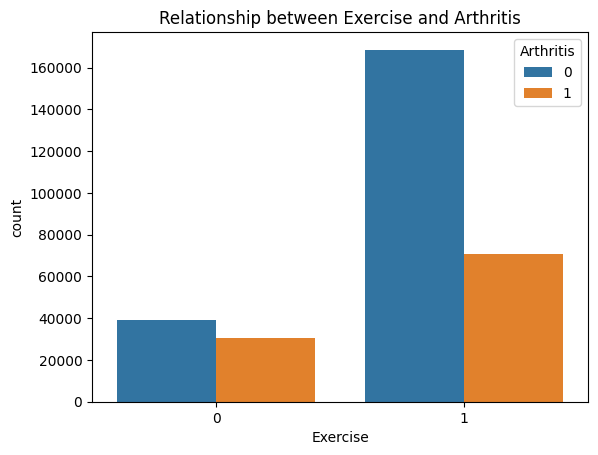

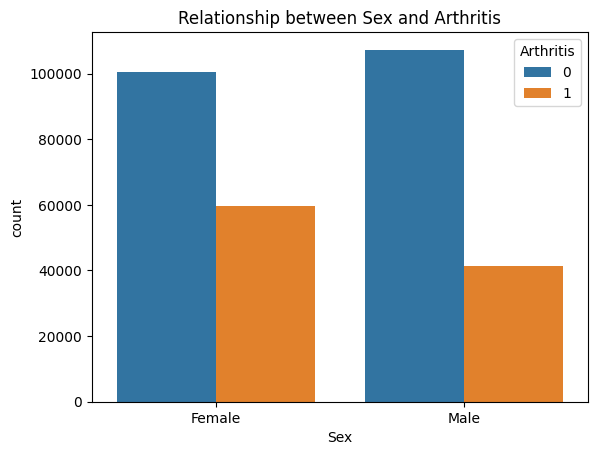

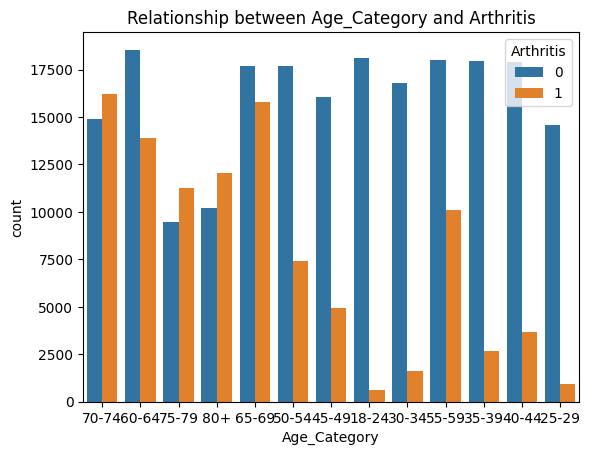

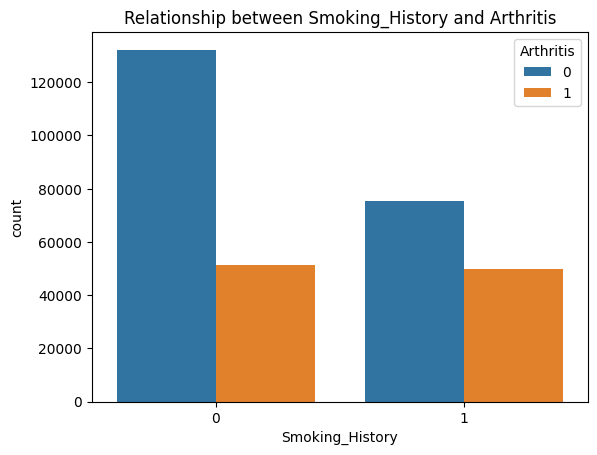

In [59]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.show()

In [60]:
df5.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1.0,0,2,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,1.0,0,2,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,4,1,1,0,0,0,1.0,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,4,0,0,0,0,0,0.0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [61]:
df[df["Heart_Disease"] == 1].shape

(24971, 19)

In [62]:
df[df['Exercise'] == 1].shape

(239381, 19)

In [63]:
# Exercise habits of Heart disease patients
Heart_disease_counts = df[df["Heart_Disease"] == 1]
exercise_counts = Heart_disease_counts['Exercise'].value_counts()

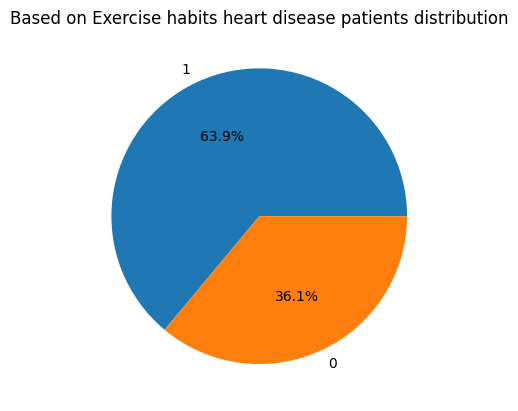

In [64]:
plt.pie(exercise_counts.values, labels=exercise_counts.index, autopct='%1.1f%%')

plt.title("Based on Exercise habits heart disease patients distribution")
plt.show()

The analysis shows that among the heart disease patients 63.9% people not doing exercise regularly

it shows exercise habits heavily effect in preventing heart disease

In [65]:
Heart_disease_counts = df[df["Heart_Disease"] == 1]


Text(0.5, 1.0, 'Alcohol consumption distributiion among Heart Disease patients')

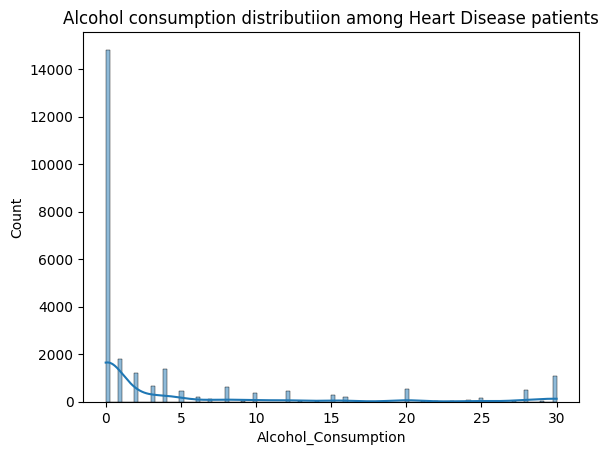

In [67]:
# Alcohol consumptiomdistribution amonng the heart disease patients
sns.histplot(data=Heart_disease_counts, x='Alcohol_Consumption', kde=True)
plt.title('Alcohol consumption distributiion among Heart Disease patients')

Boxplot of Alcohol consumptionn

Text(0.5, 1.0, 'Alcohol Consumption variation among Heart Disease Patients')

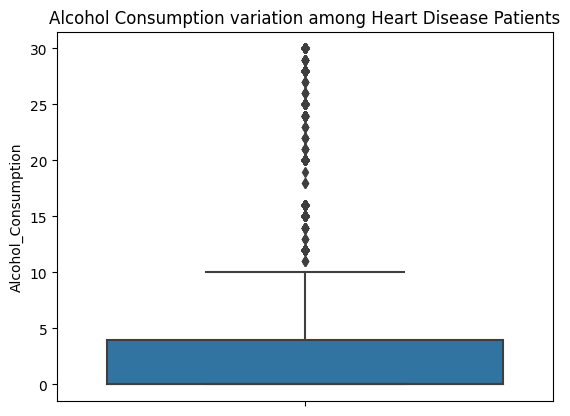

In [68]:
sns.boxplot(data=Heart_disease_counts, y="Alcohol_Consumption")
plt.title("Alcohol Consumption variation among Heart Disease Patients")

Depression effect on Heart disease patients

In [69]:
Heart_disease_counts = df[df["Heart_Disease"] == 1]
Depression_counts = Heart_disease_counts['Depression'].value_counts()

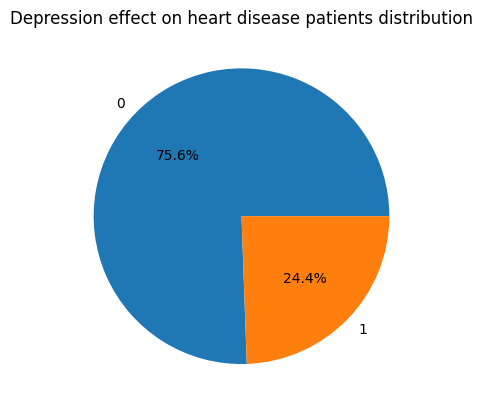

In [70]:
plt.pie(Depression_counts.values, labels=Depression_counts.index, autopct='%1.1f%%')

plt.title("Depression effect on heart disease patients distribution")
plt.show()

In [71]:
depression_percents = Depression_counts / Depression_counts.sum() * 100
depression_percents

Depression
0    75.567658
1    24.432342
Name: count, dtype: float64

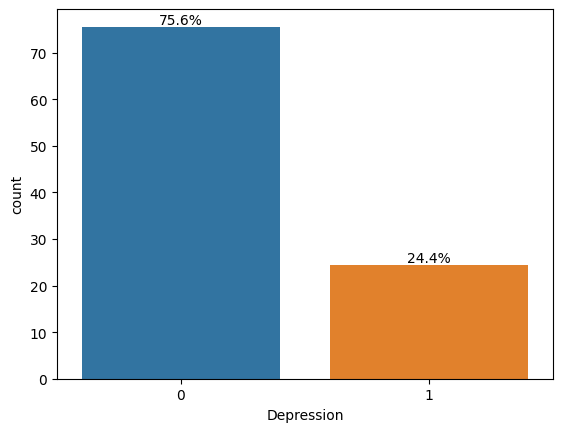

In [72]:

ax = sns.barplot(x=Depression_counts.index, y=depression_percents)

for p in ax.patches:
   ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

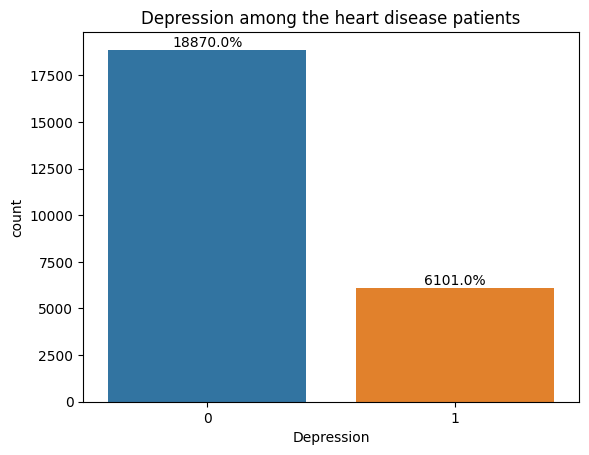

In [73]:
# By countplot

Heart_disease_counts = df[df["Heart_Disease"] == 1]
Depression_counts = Heart_disease_counts['Depression'].value_counts()
ax = sns.countplot(data=Heart_disease_counts, x="Depression")
plt.title("Depression among the heart disease patients")

for p in ax.patches:
   ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

so from these graphs 75% people of heart disease patients suffering from depression

In [74]:
df5.head(1)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0


Text(0.5, 1.0, 'Height distrubution of among the Heart disease patients')

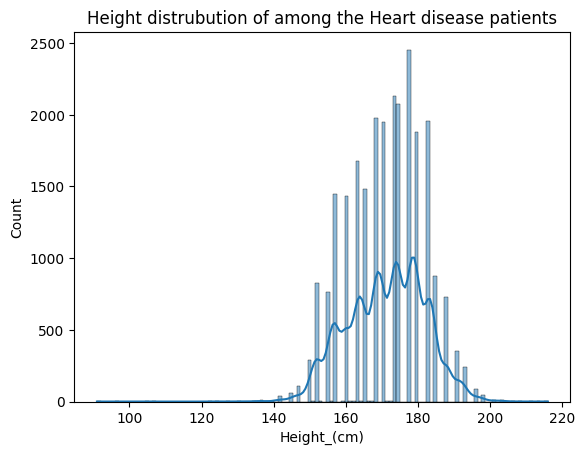

In [75]:
# Univariant analysis with heart disease
# sns.histplot(data=Heart_disease_counts, x='Alcohol_Consumption', kde=True)
# plt.title('Alcohol consumption distributiion among Heart Disease patients')

sns.histplot(data=Heart_disease_counts, x="Height_(cm)", kde=True)
plt.title('Height distrubution of among the Heart disease patients')


<Axes: title={'center': 'Alcohol consumption distributiion among Heart Disease patients'}, xlabel='Weight_(kg)', ylabel='Count'>

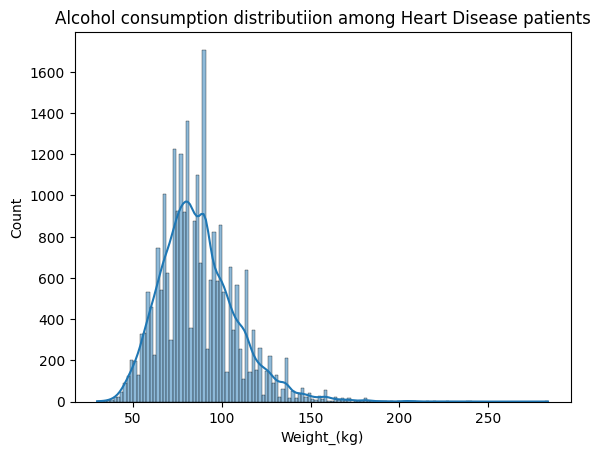

In [76]:
plt.title('Alcohol consumption distributiion among Heart Disease patients')
sns.histplot(data=Heart_disease_counts, x="Weight_(kg)", kde=True)

<Axes: title={'center': 'BMI distribuition among the heart Disease patients'}, xlabel='BMI', ylabel='Count'>

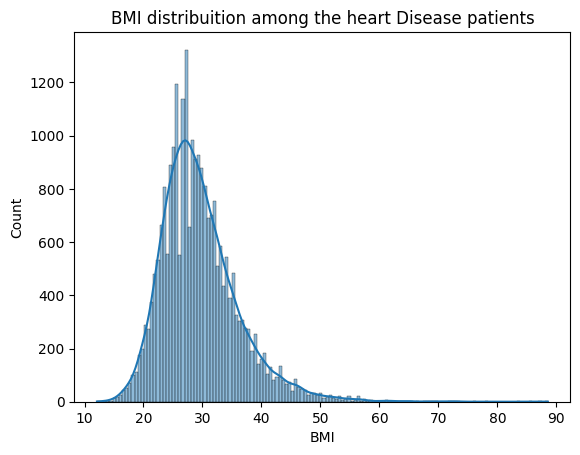

In [77]:
plt.title('BMI distribuition among the heart Disease patients')
sns.histplot(data=Heart_disease_counts, x="BMI", kde=True)

<Axes: title={'center': 'Alcohol consumption distributiion among Heart Disease patients'}, xlabel='Alcohol_Consumption', ylabel='Count'>

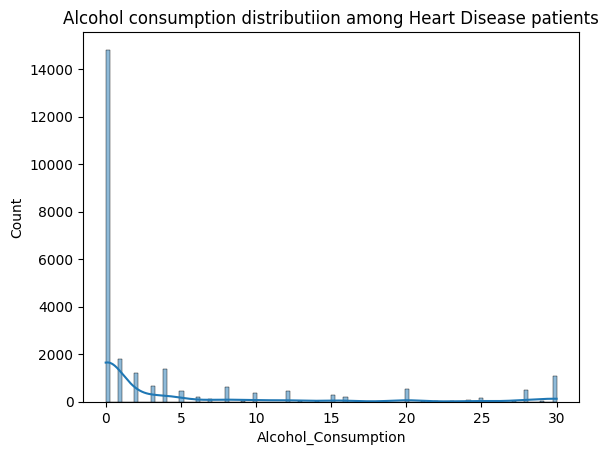

In [78]:
plt.title('Alcohol consumption distributiion among Heart Disease patients')
sns.histplot(data=Heart_disease_counts, x="Alcohol_Consumption", kde=True)

In [79]:
df5.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1.0,0,2,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


<Axes: title={'center': 'Fruit_Consumption distributiion among Heart Disease patients'}, xlabel='Fruit_Consumption', ylabel='Count'>

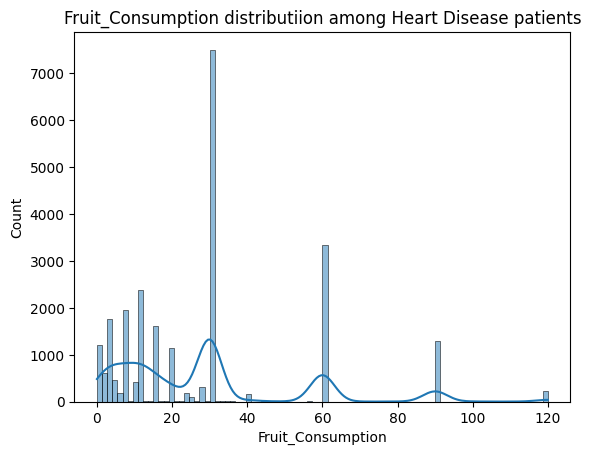

In [80]:
plt.title('Fruit_Consumption distributiion among Heart Disease patients')
sns.histplot(data=Heart_disease_counts, x="Fruit_Consumption", kde=True)

<Axes: title={'center': 'Green_Vegetables_Consumption among Heart Disease patients'}, xlabel='Green_Vegetables_Consumption', ylabel='Count'>

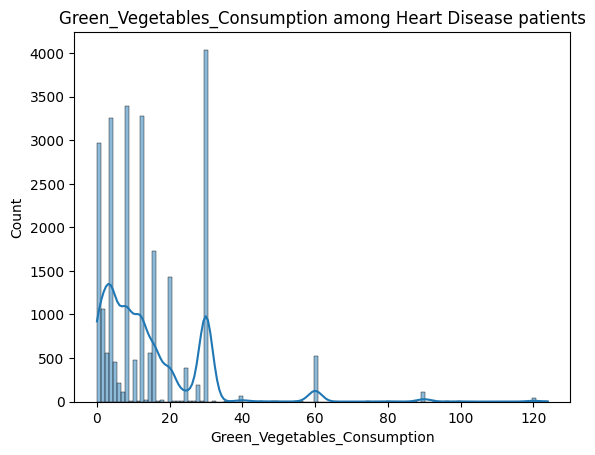

In [81]:
plt.title('Green_Vegetables_Consumption among Heart Disease patients')
sns.histplot(data=Heart_disease_counts, x="Green_Vegetables_Consumption", kde=True)

<Axes: title={'center': 'FriedPotato_Consumption distributiion among Heart Disease patients'}, xlabel='FriedPotato_Consumption', ylabel='Count'>

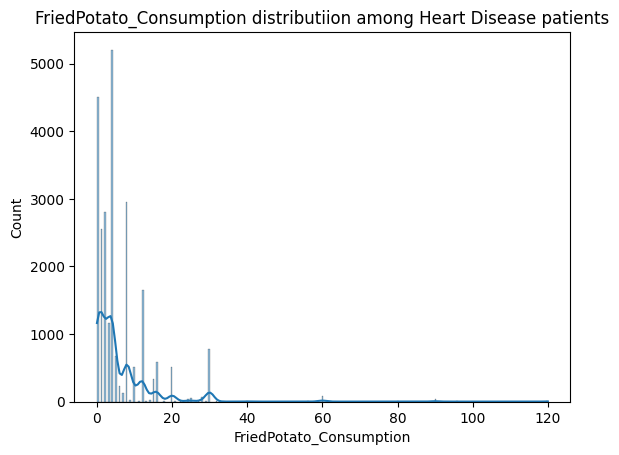

In [82]:
plt.title('FriedPotato_Consumption distributiion among Heart Disease patients')
sns.histplot(data=Heart_disease_counts, x="FriedPotato_Consumption", kde=True)

In [83]:
# different Bivarant analysis

Text(0.5, 1.0, 'Depression among the heart disease patients')

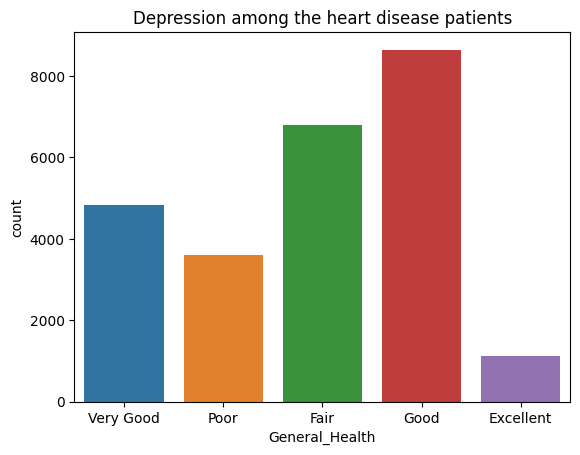

In [85]:
# Bivariant analysis of Heart disease
ax = sns.countplot(data=Heart_disease_counts, x="General_Health")
plt.title("Depression among the heart disease patients")



In [86]:
df.head(1)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0


Text(0.5, 1.0, 'Depression among the heart disease patients')

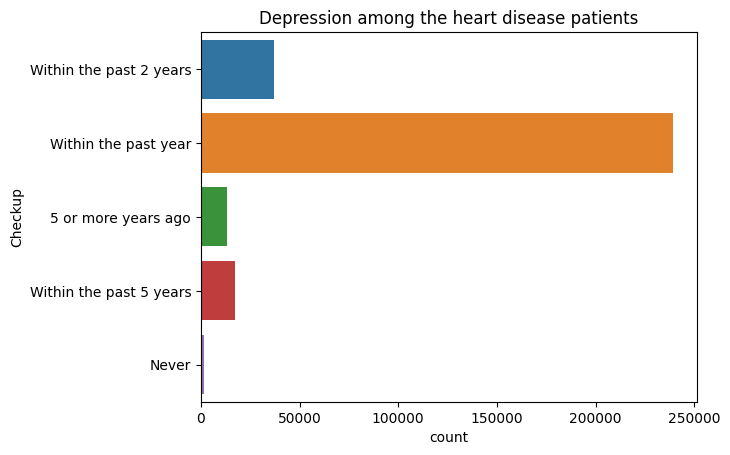

In [87]:
ax = sns.countplot(y=df["Checkup"], data=df['Heart_Disease'])
plt.title("Depression among the heart disease patients")


<Axes: xlabel='Exercise', ylabel='count'>

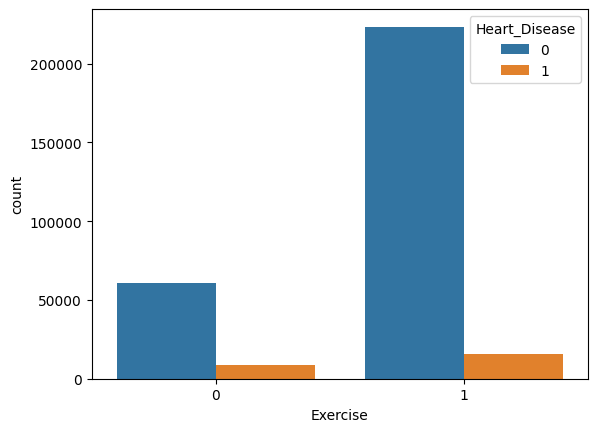

In [88]:
sns.countplot(x=df["Exercise"], hue=df['Heart_Disease'])

Text(0.5, 1.0, 'Depression among the heart disease patients')

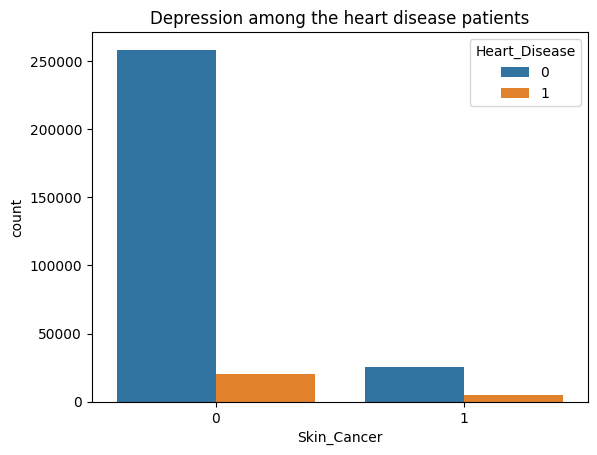

In [89]:
ax = sns.countplot(x=df["Skin_Cancer"], hue=df['Heart_Disease'])
plt.title("Depression among the heart disease patients")


In [90]:
df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


Text(0.5, 1.0, 'Other_Cancer among the heart disease patients')

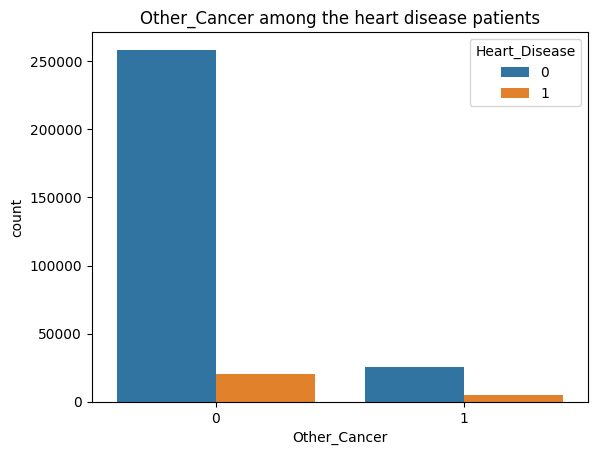

In [91]:
ax = sns.countplot(x=df["Other_Cancer"], hue=df['Heart_Disease'])
plt.title("Other_Cancer among the heart disease patients")

Text(0.5, 1.0, 'Diabetes among the heart disease patients')

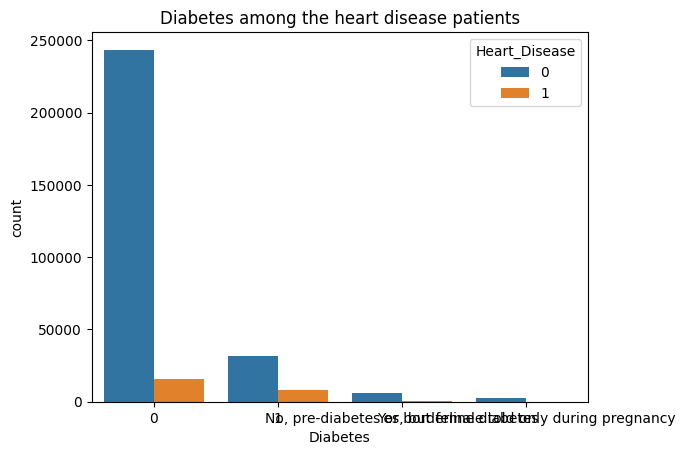

In [92]:
ax = sns.countplot(x=df["Diabetes"], hue=df['Heart_Disease'])
plt.title("Diabetes among the heart disease patients")

Text(0.5, 1.0, 'Depression among the heart disease patients')

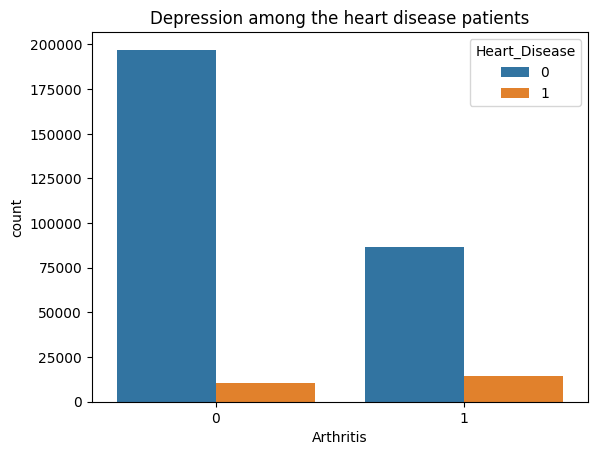

In [93]:
ax = sns.countplot(x=df["Arthritis"], hue=df['Heart_Disease'])
plt.title("Depression among the heart disease patients")

Text(0.5, 1.0, 'Sex and the heart disease patients')

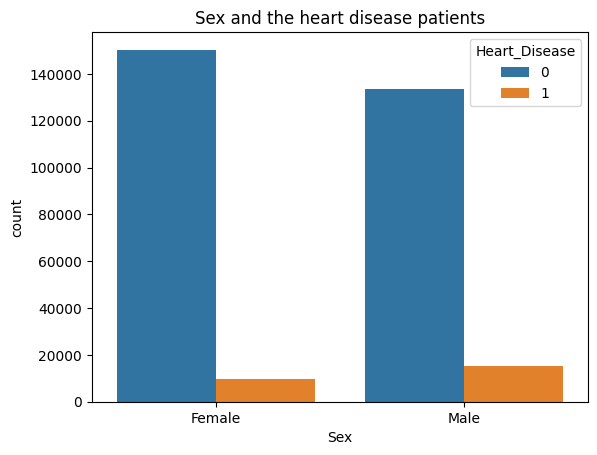

In [94]:
ax = sns.countplot(x=df["Sex"], hue=df['Heart_Disease'])
plt.title("Sex and the heart disease patients")

Text(0.5, 1.0, 'Smoking_History and the heart disease patients')

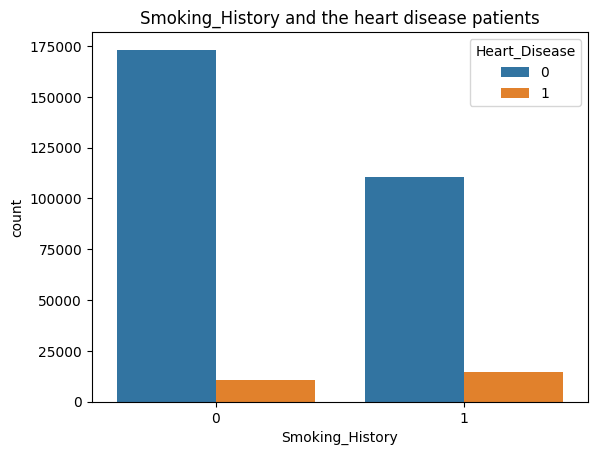

In [95]:
ax = sns.countplot(x=df["Smoking_History"], hue=df['Heart_Disease'])
plt.title("Smoking_History and the heart disease patients")

In [96]:
df5.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1.0,0,2,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0


In [97]:
df6 = df5.drop(["General_Health","Checkup","Exercise","Heart_Disease","Skin_Cancer","Other_Cancer","Depression","Diabetes","Arthritis","Sex","Age_Category"], axis="columns")
df6

,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


<Axes: >

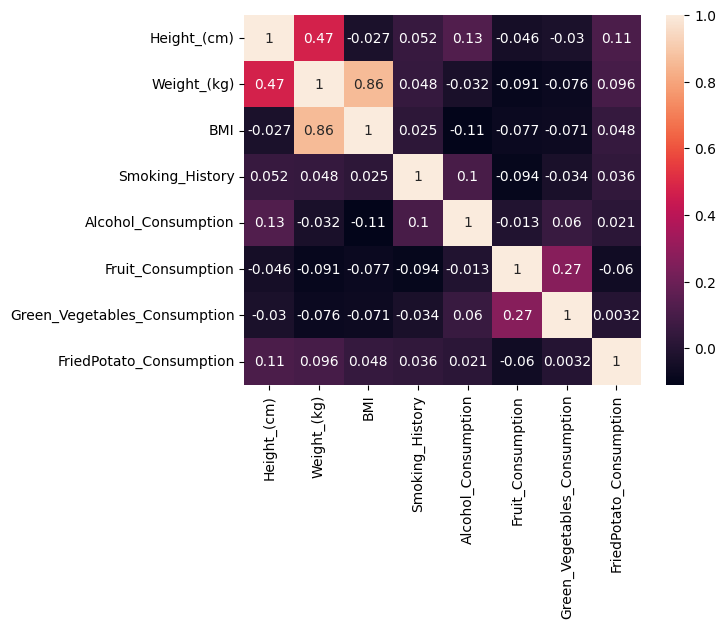

In [98]:
sns.heatmap(df6.corr(), annot=True)

<Axes: xlabel='BMI', ylabel='Heart_Disease'>

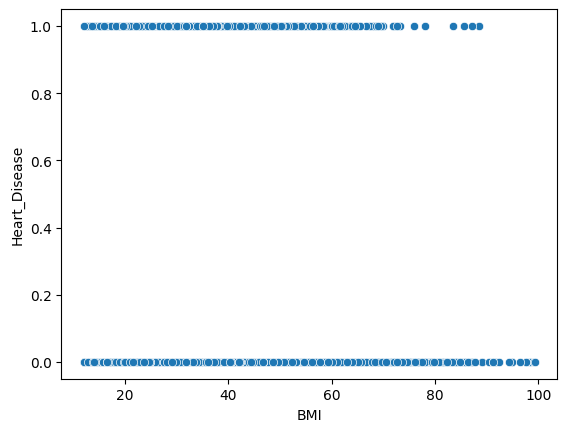

In [99]:
sns.scatterplot(y="Heart_Disease", x="BMI", data=df)

<Axes: xlabel='Age_Category', ylabel='count'>

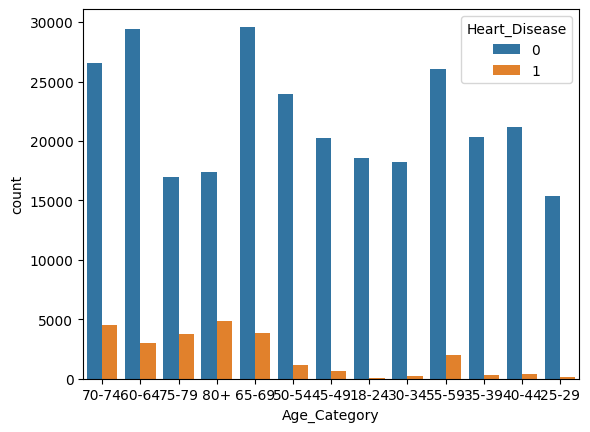

In [100]:
sns.countplot(x="Age_Category", hue=df["Heart_Disease"],data=df)

<Axes: xlabel='Age_Category', ylabel='Count'>

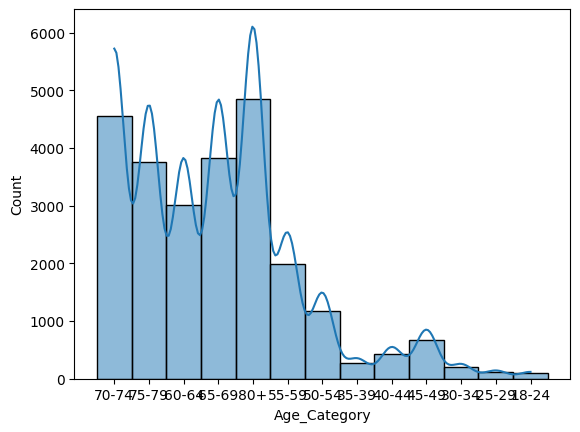

In [101]:
sns.histplot(data=Heart_disease_counts, x="Age_Category", kde=True)

In [102]:
df5.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1.0,0,2,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,1.0,0,2,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,4,1,1,0,0,0,1.0,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,4,0,0,0,0,0,0.0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [103]:
age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df5['Age_Category'] = df5['Age_Category'].map(age_category_mapping)

In [104]:
df5["Age_Category"].unique()

array([10,  8, 11, 12,  9,  6,  5,  0,  2,  7,  3,  4,  1], dtype=int64)

In [105]:

df5['Age_Category'] = df5['Age_Category'].replace({
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
})

df5['Age_Category']

0         10
1         10
2          8
3         11
4         12
          ..
308849     1
308850     9
308851     2
308852     9
308853     5
Name: Age_Category, Length: 308854, dtype: int64

In [106]:
df5['Age_Category'].unique()

array([10,  8, 11, 12,  9,  6,  5,  0,  2,  7,  3,  4,  1], dtype=int64)

In [107]:
df5.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1.0,0,2,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,1.0,0,2,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,4,1,1,0,0,0,1.0,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,4,0,0,0,0,0,0.0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [108]:
# Duplicate checker
import pandas as pd
df6 = df5.duplicated().sum()
df6

80

In [109]:
data = df6.drop_duplicates()

AttributeError: 'numpy.int64' object has no attribute 'drop_duplicates'

In [110]:
# Outlier removal

<Axes: ylabel='Height_(cm)'>

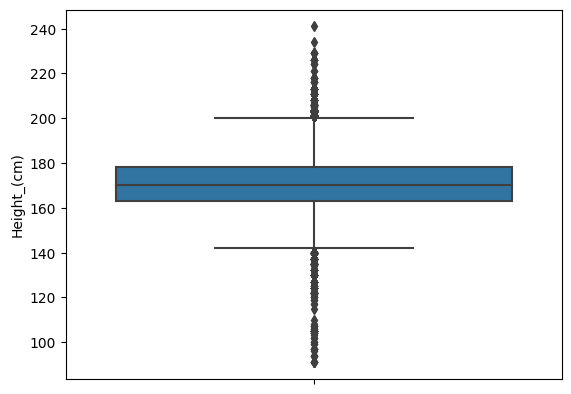

In [111]:
sns.boxplot(y=df['Height_(cm)'])

<Axes: ylabel='Weight_(kg)'>

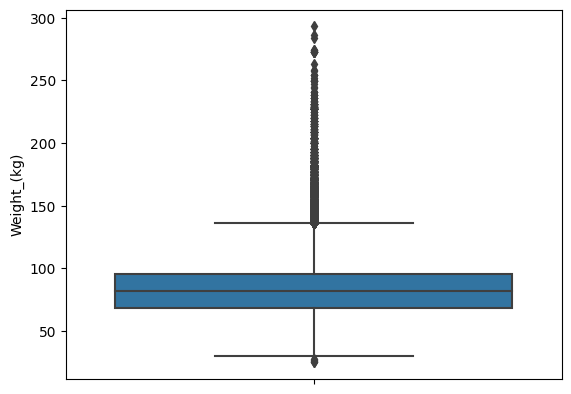

In [112]:
sns.boxplot(y=df['Weight_(kg)'])

<Axes: ylabel='BMI'>

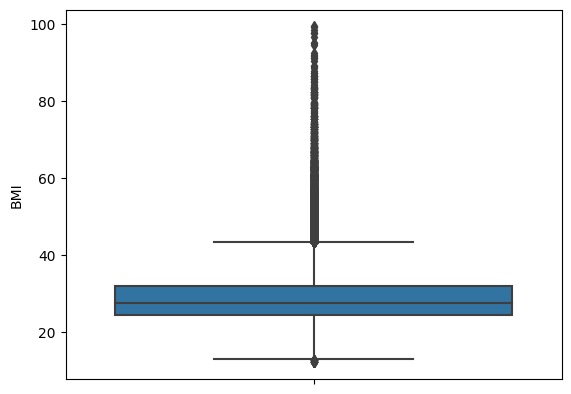

In [113]:
sns.boxplot(y=df['BMI'])

<Axes: ylabel='Alcohol_Consumption'>

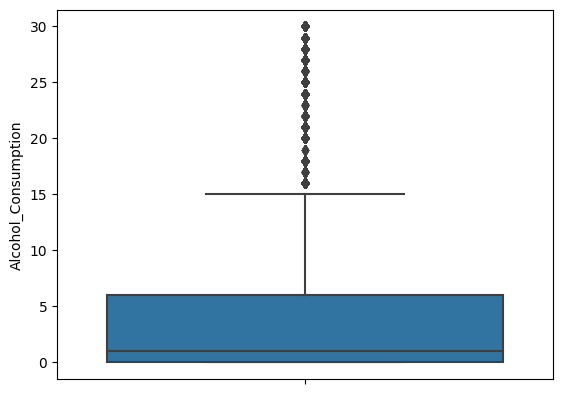

In [114]:
sns.boxplot(y=df['Alcohol_Consumption'])

<Axes: ylabel='Fruit_Consumption'>

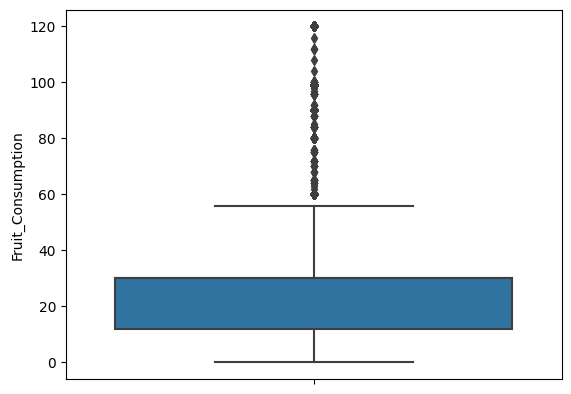

In [115]:
sns.boxplot(y=df['Fruit_Consumption'])

<Axes: ylabel='Green_Vegetables_Consumption'>

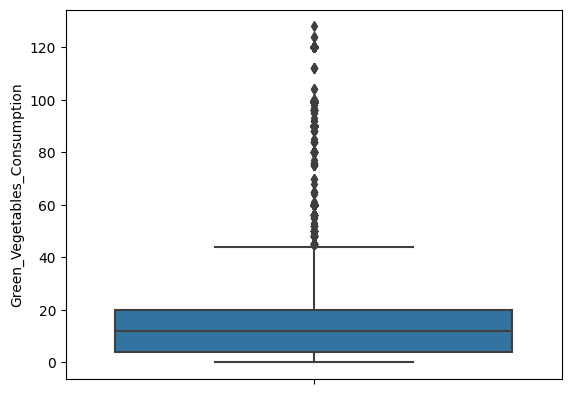

In [116]:
sns.boxplot(y=df['Green_Vegetables_Consumption'])

<Axes: ylabel='FriedPotato_Consumption'>

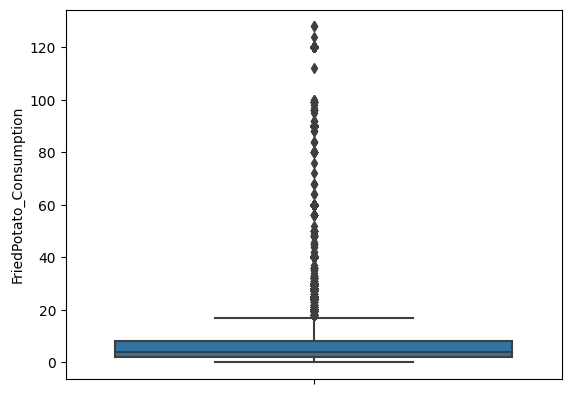

In [117]:
sns.boxplot(y=df['FriedPotato_Consumption'])


In [118]:
df5.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1.0,0,2,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,1.0,0,2,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,4,1,1,0,0,0,1.0,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,4,0,0,0,0,0,0.0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


Feature Engineering

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [121]:
X = df5.drop(["Heart_Disease"], axis="columns")
y = df5.Heart_Disease
y

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 308854, dtype: int64

In [122]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)

In [124]:
len(X_train)

247083

In [125]:
len(X_test)

61771

In [126]:
df5.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,0.0,1,2,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1.0,0,2,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,1.0,0,2,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0


In [209]:
# Model Training

Logistic regression

In [127]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [128]:
model.predict_proba(X_test)

array([[0.93851755, 0.06148245],
       [0.92872625, 0.07127375],
       [0.98274098, 0.01725902],
       ...,
       [0.99001764, 0.00998236],
       [0.96860658, 0.03139342],
       [0.67961538, 0.32038462]])

In [163]:
lg = model.score(X_test, y_test)
lg

0.9187159022842434

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
y_pred = model.predict(X_test)

In [133]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56458,   286],
       [ 4735,   292]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

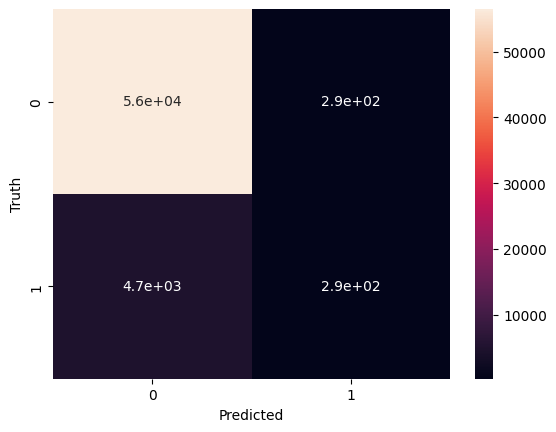

In [135]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Random forest

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [138]:
rf.score(X_test, y_test)

0.9185863916724677

In [140]:
y_predicted = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[56543,   201],
       [ 4828,   199]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

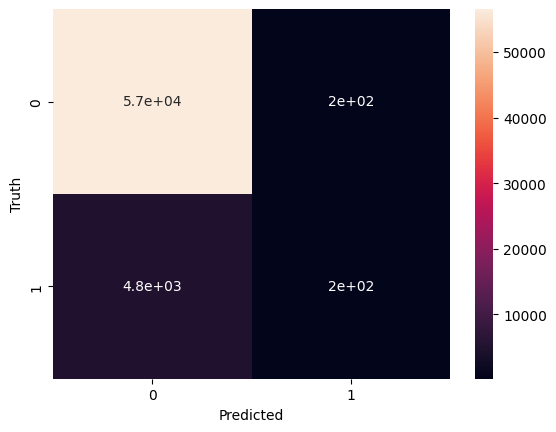

In [141]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Decison Trese

In [142]:
dt = DecisionTreeClassifier()

In [143]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
dt.score(X_test, y_test)

0.8611322465234496

In [145]:
y_predicted = dt.predict(X_test)

In [146]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[51937,  4807],
       [ 3771,  1256]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

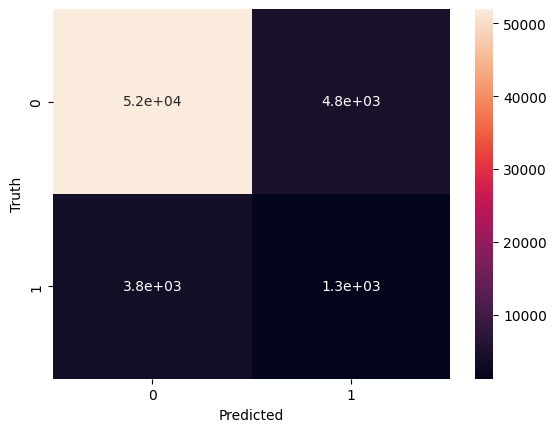

In [147]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [149]:
from sklearn.tree import ExtraTreeClassifier

In [150]:
ed = ExtraTreeClassifier()

In [151]:
ed.fit(X_train, y_train)

ExtraTreeClassifier()

In [152]:
ed.score(X_test, y_test)

0.868239141344644

In [154]:
y_predicted = ed.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[52540,  4204],
       [ 3935,  1092]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

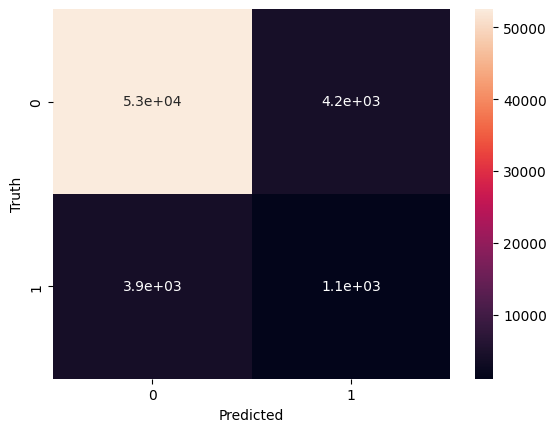

In [155]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [158]:
knn.score(X_test, y_test)

0.9108319437923945

In [159]:
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[55771,   973],
       [ 4535,   492]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

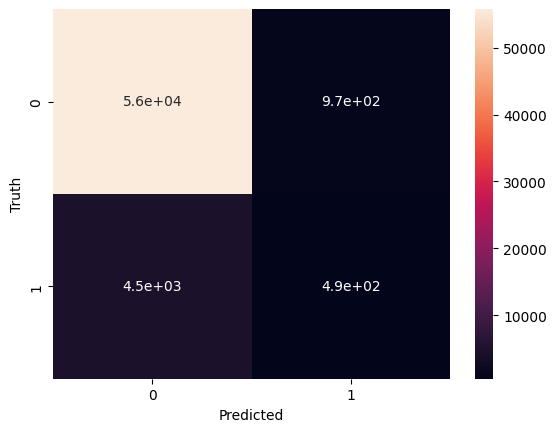

In [160]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [161]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'Extra Decision Tree']
models = pd.DataFrame(models, columns=['model'])

In [162]:
models

,model
0,Logistic Regression
1,KNN
2,Random Forest
3,Decision Tree
4,Extra Decision Tree


In [171]:
models['accuracy(%)'] = [91.8,91.8,86.1,86.8,91.08]

In [172]:
models

,model,accuracy,accuracy(%)
0,Logistic Regression,91.8,91.80
1,KNN,2.0,91.80
2,Random Forest,3.0,86.10
3,Decision Tree,4.0,86.80
4,Extra Decision Tree,5.0,91.08


In [173]:
model = models.drop(["accuracy"], axis="columns")

In [174]:
model

,model,accuracy(%)
0,Logistic Regression,91.80
1,KNN,91.80
2,Random Forest,86.10
3,Decision Tree,86.80
4,Extra Decision Tree,91.08
